
# Rewriting systems for hypergraphs

Here our idea is to compare two different approaches, such as  
1. the sequential/motifs approach (diagrams and graph elements such as checking directly sequences).
2. the algebraic approach (matrix approach) for rewriting diagramatic calculus




# Sequential/motifs approach

## Main function classes
To find triples, functions from hypergraphs.

In [ ]:
from itertools import combinations

def parse_hypergraph(hypergraph):
    # put edges into a list
    edges = []
    for hyperedge in hypergraph:
        edges.append(tuple(sorted(hyperedge)))
    return edges

def find_triples(edges):
    # function to find triples hyperedges from the data
    triples = []
    for edge in edges:
        if len(edge) == 3:
            triples.append(edge)
    return triples

def find_duples(edges):
    # function to find triples hyperedges from the data
    duples = []
    for edge in edges:
        if len(edge) == 2:
            duples.append(edge)
    return duples


def generate_triples(edges):
    # generate triple structures
    triples = []
    for edge in edges:
        for pair in combinations(edge, 3):
            triples.append(pair)
    return triples

def filter_triples(triples):
    # select only hyperedges of cardinality 3
    return [triple for triple in triples if len(set(triple)) == 3]

def find_intersecting_2triples(triples):
    '''
    intersecting triples list
    as soon as we find one intersection we create a new list element, which is the intersecting PAIR combinations

    '''

    intersecting = []
    intersec_coup = [] #list of only intersecting tuples
    print('type of list intersecting',type(intersecting))
    print('as soon as we find one intersection we create a new couple of combinations')
    for i in range(len(triples)):
        for j in range(i+1, len(triples)):
            #print('j triple ',j)
            intersection = set(triples[i]).intersection(triples[j])
            #print('intersection', intersection)
            if len(intersection) == 2:
                intersecting.append(triples[i])
                intersecting.append(triples[j])

                intersec_coup.append(tuple((triples[i], triples[j])))

                #intersecting.append(tuple(sorted(list(intersection) + list(set(triples[i] + triples[j]) - intersection))))
                #print('intersecting triples list', intersecting)
                #print(intersec_coup) # 'intersecting triples couple',


    return intersecting

def find_intersecting_3triples(triples):
    '''
    intersecting triples list
    as soon as we find one intersection we create a new list element, which is the intersecting TRIPLE combinations
    '''

    intersecting = []
    print('search for triples, the list should be longer than 3 for 3-intersecting triples')
    for i in range(len(triples)):
        for j in range(i+1, len(triples)): # we need to exclude the element i from j's list
            for k in range(i+2, len(triples)): # we start from the i+1 not to repeat with the same i, j, k elements

                print('j triple ',triples[j])
                intersection = set(triples[i]).intersection(triples[j])
                intersection_tri = set(intersection).intersection (triples[k])

                #print('intersection', intersection)

                #print('intersection', intersection_tri)
                if (len(intersection) == 2): #&& (): # and if the intersecting triples are different from before
                    intersecting.append(tuple(sorted(list(intersection) + list(set(triples[i] + triples[j]) - intersection))))
                    print('intersecting triples list', intersecting)

                # at the end we will need to save only unique combinations of intersecting triples
                print('at the end we will need to save only unique combinations of intersecting triples')

    return intersecting

def find_intersecting_triple_lollipop(triples, duples):
    '''
    intersecting lollipop patterns: triple + duple
    '''

    intersecting = []
    print('search for triples, the list should be longer than 3 for 3-intersecting triples')
    for i in range(len(triples)):
        for j in range(i+1, len(duples)): # we need to exclude the element i from j's list and find connected lollipop-edge
            print('j triple ',triples[j])
            intersection = set(triples[i]).intersection(duples[j])
            intersection_tri = set(intersection).intersection (triples[k])

            #print('intersection', intersection)

            #print('intersection', intersection_tri)
            if (len(intersection) == 1): #&& (): # and if the intersecting triples are different from before
                intersecting.append(tuple(sorted(list(intersection) + list(set(triples[i] + triples[j]) - intersection))))
                print('intersecting triples list', intersecting)

                # at the end we will need to save only unique combinations of intersecting triples
                print('at the end we will need to save only unique combinations of intersecting triples')

    return intersecting



def save_to_file(intersecting_triples, filename):
    with open(filename, 'w') as file:
        for triple in intersecting_triples:
            file.write(f"{triple}\n")
    print('done in saving')



# Creating hypergraph
We can either load the data or create a graph.

Generate example hypergraph

In [ ]:
# generate hypergraph edges list

import random

Ne = 50 # number of edges


# Function to generate a random sublist
def generate_random_sublist(length):
    return [random.randint(1, Ne) for _ in range(length)]

# Function to generate the list of sublists
def generate_list_of_sublists(num_sublists, max_length):
    return [generate_random_sublist(random.randint(1, max_length)) for _ in range(num_sublists)]



def generate_random_tuple(length):
    return tuple(random.randint(1, 100) for _ in range(length))

# Function to generate the list of tuples
def generate_list_of_sublists(num_sublists, max_length):

    return [generate_random_tuple(random.randint(1, max_length)) for _ in range(num_tuples)]



# Generating a list of sublists
num_sublists = 5  # Number of sublists
max_length = 10   # Maximum length of each sublist
list_of_sublists = generate_list_of_sublists(num_sublists, max_length)

# Printing the list of sublists
print(list_of_sublists)
print(list_of_sublists[1])
print(type(list_of_sublists[1]))



[[43, 36], [12, 42, 3, 15, 20, 41, 11, 3, 33, 7], [3, 48, 35, 37, 19, 24, 22], [16, 38], [29, 40, 34, 21]]
[12, 42, 3, 15, 20, 41, 11, 3, 33, 7]
<class 'list'>


In [ ]:
# Given hypergraph example
hypergraph = [(1,2,3), (1,2,5), (3,4,5), (1,2,4,5), (1,2), (1,6), (1,4,5), (1,6,7), (1,6,8), (2,6,7), (1,2,4), (1,2,7), (1,5,7), (1,5,6), (1,3,6), (1,5,6)]

# Step 1: Parse hypergraph and detect all edges into a list
edges = parse_hypergraph(hypergraph)

print(edges)
print(type(edges[0]))


[(1, 2, 3), (1, 2, 5), (3, 4, 5), (1, 2, 4, 5), (1, 2), (1, 6), (1, 4, 5), (1, 6, 7), (1, 6, 8), (2, 6, 7), (1, 2, 4), (1, 2, 7), (1, 5, 7), (1, 5, 6), (1, 3, 6), (1, 5, 6)]
<class 'tuple'>



## Load the data

In [ ]:


from ast import literal_eval
with open('hyperedges_list_arxiv_test.txt') as f:
    edge_know = [list(literal_eval(line)) for line in f]

print('size of edges', len(edge_know[0]))
print(edge_know)


# Application of rewriting systems to the real dataset


In [ ]:
# apply to the real dataset

tripl_know = find_triples(edge_know[0])
print(tripl_know)
print(tripl_know[0])

[['math-ph', 'astro-ph.co', 'math.mp'], ['astro-ph.ep', 'astro-ph.im', 'physics.pop-ph'], ['cs.sy', 'cs.hc', 'math.oc'], ['quant-ph', 'math.oc', 'math.pr'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he'], ['gr-qc', 'math.st', 'stat.th'], ['math.ap', 'math.ca', 'math.mg'], ['cs.lg', 'q-bio.pe', 'stat.ml'], ['cs.cc', 'math.ds', 'math.lo'], ['cs.gt', 'cs.lg', 'econ.th'], ['physics.class-ph', 'cond-mat.other', 'physics.gen-ph'], ['math.oc', 'math.ds', 'math.na'], ['cs.ro', 'cs.cv', 'cs.cy'], ['stat.ap', 'cs.ai', 'stat.ml'], ['q-fin.ec', 'cs.lg', 'nlin.ao'], ['quant-ph', 'stat.ap', 'stat.ml'], ['math.na', 'stat.ap', 'stat.me'], ['math.ra', 'math.ho', 'math.rt'], ['physics.comp-ph', 'cs.dc', 'quant-ph'], ['math.pr', 'math.gr', 'math.oa'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.soft'], ['math.pr', 'math.ds', 'physics.data-an'], ['cs.ni', 'cs.ma', 'cs.sy'], ['cs.lg', 'q-bio.bm', 'stat.ml'], ['cs.dm', 'cs.dc', 'math.co'], ['cs.cl', 'cs.hc', 'cs.sd'], ['math.dg', 'gr-qc', 'math.ag'], ['m

# Application to the random hypergraph
We find possible triple edges.

In [ ]:
# Step 2: Find all possible triples edges
from itertools import combinations


# Find all triples
triples = find_triples(edges)
# Find all subsets of length 3

print('all edges')
print(edges)

print("List of all triples with exactly three elements:")
print(triples)


print('type', type(triples))
print('type', type(triples[1]))

#print(filt_triple)
#filtered_tripl = set(triples)
#print("List of all triples with exactly three elements:")
#print(filt_triple)



all edges
[(1, 2, 3), (1, 2, 5), (3, 4, 5), (1, 2, 4, 5), (1, 2), (1, 6), (1, 4, 5), (1, 6, 7), (1, 6, 8), (2, 6, 7), (1, 2, 4), (1, 2, 7), (1, 5, 7), (1, 5, 6), (1, 3, 6), (1, 5, 6)]
List of all triples with exactly three elements:
[(1, 2, 3), (1, 2, 5), (3, 4, 5), (1, 4, 5), (1, 6, 7), (1, 6, 8), (2, 6, 7), (1, 2, 4), (1, 2, 7), (1, 5, 7), (1, 5, 6), (1, 3, 6), (1, 5, 6)]
type <class 'list'>
type <class 'tuple'>


Application to the random hypergraph.
We search intersecting hyperedges.

In [ ]:
# Step 3: Find combinations of triples intersecting by one edge
intersecting_dual_triples = find_intersecting_2triples(triples)
print(' ')
# Find combinations of triples intersecting by one edge
intersecting_trio_triples = find_intersecting_3triples(triples)


print("\n List of nodes combinations where any two triple-edges intersect by one edge / dual triples:")
print(intersecting_dual_triples)


# Save intersecting triples to a text file
save_to_file(intersecting_dual_triples, "intersecting_triple_couples.txt")

print("\nList of combinations where three triple edges intersecting by one edge / trio triples:")
print(intersecting_trio_triples)

type of list intersecting <class 'list'>
as soon as we find one intersection we create a new couple of combinations
 
search for triples, the list should be longer than 3 for 3-intersecting triples
j triple  (1, 2, 5)
intersecting triples list [(1, 2, 3, 5)]
at the end we will need to save only unique combinations of intersecting triples
j triple  (1, 2, 5)
intersecting triples list [(1, 2, 3, 5), (1, 2, 3, 5)]
at the end we will need to save only unique combinations of intersecting triples
j triple  (1, 2, 5)
intersecting triples list [(1, 2, 3, 5), (1, 2, 3, 5), (1, 2, 3, 5)]
at the end we will need to save only unique combinations of intersecting triples
j triple  (1, 2, 5)
intersecting triples list [(1, 2, 3, 5), (1, 2, 3, 5), (1, 2, 3, 5), (1, 2, 3, 5)]
at the end we will need to save only unique combinations of intersecting triples
j triple  (1, 2, 5)
intersecting triples list [(1, 2, 3, 5), (1, 2, 3, 5), (1, 2, 3, 5), (1, 2, 3, 5), (1, 2, 3, 5)]
at the end we will need to save o

In [ ]:
# Step 4: generate new list from older list


def generate_new_list(triples):
    intersecting_edge = None
    non_intersecting_elements = set()

    # Find the intersecting edge
    for triple in triples:
        if intersecting_edge is None:
            intersecting_edge = set(triple)
        else:
            intersecting_edge &= set(triple)

    # Find the non-intersecting elements
    for triple in triples:
        non_intersecting_elements |= set(triple) - intersecting_edge

    new_list = [tuple(sorted(non_intersecting_elements)), tuple(sorted(intersecting_edge))]
    new_list1 = [tuple(sorted(non_intersecting_elements)), (sorted(intersecting_edge))]
    print((sorted(non_intersecting_elements)))

    return new_list, new_list1

# Given list of triples
triples = [(1, 2, 5), (1, 4, 5), (1, 3, 5)]

# Generate new list
rewritten_list, rewritten_list1 = generate_new_list(triples)

# Print the new list
print(rewritten_list)

print('yet to correct list', rewritten_list1)


[2, 3, 4]
[(2, 3, 4), (1, 5)]
yet corrected list [(2, 3, 4), [1, 5]]


In [ ]:
test_list = rewritten_list

particular_value = 5
result = []
temp_list = []
for i in test_list:
    if i == particular_value:
        temp_list.append(i)
        result.append(temp_list)
        temp_list = []
    else:
        temp_list.append(i)
result.append(temp_list)

print(result)

## Algebraic way

We are doing it other way for working with rewriting

In [ ]:

# step 1: we create empty tensor matrix
Ns = len(set(edges)) # number of nodes from edges of hypergraph





In [ ]:
# apply the same for the edges from knowledge graph

print(type(edge_know[0]))
Ns = len((edge_know[0]))
print('edges number ',Ns)


# Create tensor from the hypergraph

Hypermatrix creation from the hypergraph.


In [ ]:
import numpy as np
#given a list of triples [(1,2,3), (1,2,4), (1,4,5)] etc. I need to calculate the matrix tensor, 3-dimensional matrix, which will have inputs of the matrix elements

# step 1: we create empty tensor matrix
Nn = len(set(edges)) # number of nodes #10 #

edges = parse_hypergraph(hypergraph) #[(1, 2, 5), (1, 4, 5), (1, 2, 5), (1, 3, 5), (1, 4, 5), (1, 3, 5)]

# initialize matrix
adjacency_matrix = np.zeros((Nn, Nn, Nn))  #Aijk = 0 everywhere except places where we have edges, e.g.

#print(Aijk)


def tensor_from_list(edges, Nn):

    # Define the list of edges
    #edges = [(1, 2, 3), (1, 4, 5), (1, 3, 4)]

    # Determine the number of nodes
    num_nodes = max(max(edge) for edge in edges)

    # Initialize the adjacency matrix with zeros
    adjacency_matrix =  np.zeros((Nn, Nn, Nn)) #num_nodes,num_nodes,num_nodes))#[[0] * num_nodes for _ in range(num_nodes)]

    # Populate the adjacency matrix based on the edges
    for edge in edges:
        node1, node2, node3 = edge
        adjacency_matrix[node1 - 1][node2 - 1][node3-1] = 1
        adjacency_matrix[node2 - 1][node1 - 1][node3-1] = 1  # Assuming an undirected graph

    # Print the adjacency matrix
    for row in adjacency_matrix:
        print(row)

    return adjacency_matrix


# should be applied to triple edges
edges_tr = triples
Aijk = tensor_from_list(edges_tr, Nn)

# Save tensor to a text file
save_to_file(Aijk, "tensor_hypergraph_rewritten.txt")

print(Aijk)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

# Testing on data hypergraph

We use timing for estimating time it takes to calculate the space.

In [ ]:
def transform_to_numbers(nodes):
    # Create a mapping between nodes and numbers
    node_to_number = {}
    number = 1
    transformed_nodes = []

    # Iterate through the list of nodes and replace each string with its corresponding number
    for node_list in nodes:
        transformed_node_list = []
        for node in node_list:
            if node not in node_to_number:
                node_to_number[node] = number
                number += 1
            transformed_node_list.append(node_to_number[node])
        transformed_nodes.append(tuple(transformed_node_list))

    return transformed_nodes

# Given list of nodes
nodes = [('a', 'b', 'c'), ('a', 'b', 'c', 'd'), ('a', 'b')]



# Transform nodes to numbers
transformed_nodes = transform_to_numbers(nodes)

# Print the transformed nodes
print(transformed_nodes)

transformed_edges = transform_to_numbers(edges)

print(transformed_edges)

[(1, 2, 3), (1, 2, 3, 4), (1, 2)]
[(1, 2, 3), (1, 2, 4, 5), (1, 2), (1, 6), (1, 4, 5), (1, 6, 7), (1, 6, 8), (2, 6, 7), (1, 2, 4), (1, 2, 7), (1, 5, 7), (1, 5, 6), (1, 3, 6), (1, 5, 6)]


In [ ]:
import time
import numpy as np

start_time = time.time()

Nn = 175 # for arxiv data are unique nodes

# initialize matrix
adjacency_matrix = np.zeros((Nn, Nn, Nn))  #Aijk = 0 everywhere except places where we have edges, e.g.

#print(Aijk)


def tensor_from_list(edges, Nn):

    # Determine the number of nodes
    num_nodes = max(max(edge) for edge in edges)

    # Initialize the adjacency matrix with zeros
    adjacency_matrix =  np.zeros((Nn, Nn, Nn)) #num_nodes,num_nodes,num_nodes))#[[0] * num_nodes for _ in range(num_nodes)]

    # Populate the adjacency matrix based on the edges in our hypergraph
    for edge in edges:
        print(edge)
        node1, node2, node3 = edge
        print(node1)
        # now we need to associate the number to each node (node1, node2, node3)

        adjacency_matrix[node1 - 1][node2 - 1][node3-1] = 1 # indexation from 0 in python
        adjacency_matrix[node2 - 1][node1 - 1][node3-1] = 1  # Assuming an undirected version of a graph

    # Print the adjacency matrix
    for row in adjacency_matrix:
        print(row)

    return adjacency_matrix


#print(tripl_know)
transformed_tripl = transform_to_numbers(tripl_know)
#print(transformed_tripl)

# run on the data
#print('edges we process', tripl_know[0])
#print(tripl_know)
#print('format', type(tripl_know))
Aijk = tensor_from_list(transformed_tripl, Nn)
print('done with processing')
# Save tensor to a text file
save_to_file(Aijk, "tensor_hypergraph_rewritten.txt")

print(Aijk)



print("--- %s seconds --- to transform to the hypermatrix" % (time.time() - start_time))



(1, 2, 3)
1
(4, 5, 6)
4
(7, 8, 9)
7
(10, 9, 11)
10
(5, 2, 12)
5
(13, 14, 15)
13
(16, 17, 18)
16
(19, 20, 21)
19
(22, 23, 24)
22
(25, 19, 26)
25
(27, 28, 29)
27
(9, 23, 30)
9
(31, 32, 33)
31
(34, 35, 21)
34
(36, 19, 37)
36
(10, 34, 21)
10
(30, 34, 38)
30
(39, 40, 41)
39
(42, 43, 10)
42
(11, 44, 45)
11
(46, 47, 48)
46
(11, 23, 49)
11
(50, 51, 7)
50
(19, 52, 21)
19
(53, 43, 54)
53
(55, 8, 56)
55
(57, 13, 58)
57
(57, 13, 59)
57
(16, 60, 9)
16
(61, 62, 63)
61
(64, 65, 28)
64
(13, 12, 42)
13
(27, 63, 6)
27
(66, 63, 67)
66
(68, 69, 70)
68
(71, 65, 72)
71
(61, 73, 68)
61
(67, 74, 10)
67
(75, 62, 48)
75
(76, 61, 46)
76
(77, 35, 78)
77
(59, 79, 80)
59
(81, 82, 83)
81
(84, 7, 85)
84
(20, 46, 86)
20
(66, 63, 34)
66
(61, 87, 88)
61
(43, 32, 89)
43
(90, 4, 16)
90
(91, 90, 46)
91
(92, 61, 20)
92
(61, 28, 93)
61
(28, 65, 94)
28
(95, 93, 96)
95
(97, 98, 58)
97
(99, 100, 101)
99
(27, 102, 13)
27
(85, 11, 20)
85
(74, 103, 49)
74
(82, 25, 104)
82
(43, 19, 50)
43
(65, 48, 61)
65
(61, 66, 75)
61
(37, 105, 1

# Computing multiplication of hyper-matrices

We multiply tensor matrices to calculate the rewriting systems applied to hypergraphs.

Our idea is to use completely the algebraic approach (matrix approach) for this here.

In [ ]:
# step 2:  we multiply hyper-matrices

import numpy as np


Mijk = np.zeros((Nn,Nn,Nn))

# Compute the resulting tensor matrix M
for i in range(Nn):
    for j in range(Nn):
        for k in range(Nn):
            for p in range(Nn): # loop through all possible (p,q) combinations
                for q in range(Nn):
                    #print('i,p,q', i,p,q)

                    #print(adjacency_matrix[i,p,q])
                    Mijk[i, j, k] = np.sum(Aijk[i,p,q] * Aijk[j,p,q] * Aijk[k,p,q])

# Save tensor to a text file
save_to_file(Mijk, "tensor_hypergraph_rewritten_triple.txt")




done in saving


In [ ]:
# test of matrix multiplication on random matrices

import numpy as np

# Generate random tensor matrices M1, M2, M3
M1 = np.random.rand(10, 10, 10)
M2 = np.random.rand(10, 10, 10)
M3 = np.random.rand(10, 10, 10)

# Initialize the resulting tensor matrix M
resulting_shape = M1.shape[0], M2.shape[0], M3.shape[0]
M = np.zeros(resulting_shape)
print('shape', np.shape(M))

# Compute the resulting tensor matrix M
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        for k in range(M.shape[2]):
            M[i, j, k] = np.sum(M1[i] * M2[j] * M3[k])

print("Resulting tensor matrix M:")
print(M)

#edges =  [(1, 2, 3), (1, 4, 5), (1, 3, 4)]
#tensor_from_list(edges)


shape (10, 10, 10)
Resulting tensor matrix M:
[[[ 9.94615254 12.55476326 10.84951305 10.80427475 11.61435243
   11.12938339 11.45588007 11.31367608 11.31102734 11.51437627]
  [12.05629132 13.50858788 12.73331164 11.03506659 14.05674085
   12.02227384 12.15282556 14.06498708 12.64996022 12.85329955]
  [11.11318542 14.54358111 12.38606606 11.17787004 13.96233913
   12.1866741  12.51094875 13.81693161 12.23395172 12.68454247]
  [12.66421699 14.00653388 12.64472876 12.04981455 14.06400566
   12.4419288  13.281711   13.65355957 12.71071302 12.56225336]
  [ 9.45423124 11.71810288  9.76457766 10.50933111 10.79547585
    9.68688124 10.72469468 11.21716845 10.1157532   9.9625327 ]
  [11.71068633 13.71749727 11.72771379 11.03492571 14.30997937
   11.64481433 12.1360557  13.33937572 12.19337349 12.18513225]
  [11.48800976 13.7874038  11.94772517 11.14869268 13.91352827
   12.19021498 12.7636324  13.90396533 12.69741791 12.05796968]
  [10.99205898 14.09073892 12.03842679 11.77633608 14.20979121
  

In [ ]:
# loop through p and q nodes from all nodes Nn

# we need to get a new matrix Mijk such that it has non zero input IFF there is nonzero element on positions of p and q for 3 edges


# Determine the number of nodes
#num_nodes = max(max(edge) for edge in edges)

# Initialize the adjacency matrix with zeros
Mijk =  np.zeros((Nn, Nn, Nn))#[[0] * num_nodes for _ in range(num_nodes)]


for i_ind in range(Nn):
  for j_ind in range(Nn):
    for k_ind in range(Nn):

      for edge in edges: # loop through all possible subedges (p,q) in the triple-edges (p,q,i)
        nodep, nodeq = edge
        adjacency_matrix[node1 - 1][node2 - 1][node3-1] = 1
        Mijk[node1 - 1][node2 - 1][node3-1] = 1





'''
def create_tensormatrix(Nsize, list):
    brute force way to create tensor matrix

    Aijk = np.zeros((Nsize, Nsize, Nsize))
    print('loading matrix')
    for i in range(Nsize):
        for j in range(Nsize): # we need to exclude the element i from j's list
            for k in range(Nsize): # we start from the i+1 not to repeat with the same i, j, k elements

                if list()
                    Aijk = 1
'''




[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Full graph rewriting


In [3]:
def match_pattern(graph, pattern):
    for i in range(len(graph) - len(pattern) + 1):
        if all(graph[i + j] == pattern[j] for j in range(len(pattern))):
            return i
    return -1

def apply_rule(graph, pattern, replacement):
    index = match_pattern(graph, pattern)
    if index != -1:
        return graph[:index] + list(replacement) + graph[index + len(pattern):]
    return graph


def apply_rule0(graph, pattern, replacement):
    index = match_pattern(graph, pattern)
    if index != -1:
        return graph[:index] + replacement + graph[index + len(pattern):]
    return graph

def rewrite_graph(input_graph, rewriting_rules):
    graph = input_graph.copy()

    for rule in rewriting_rules:
        pattern = rule[0]
        if isinstance(pattern[0], tuple):  # If the pattern consists of multiple connected nodes
            pattern_index = match_pattern(graph, pattern)
            while pattern_index != -1:
                replacement = rule[1]
                graph = apply_rule(graph, pattern, replacement)
                pattern_index = match_pattern(graph, pattern)
        else:  # If the pattern consists of a single node
            for i, node in enumerate(graph):
                if node == pattern:
                    graph[i] = rule[1]

    return graph

# Example input graph and rewriting rules
input_graph = [(1, 2), (2, 3), (3, 4), (4, 5)]
rewriting_rules = [(((1, 2), (2, 3)), ((2, 3), (3, 4))), (((3, 4),), (4, 5))]

rewritten_graph = rewrite_graph(input_graph, rewriting_rules)
print("Rewritten Graph:", rewritten_graph)


Rewritten Graph: [(2, 3), 4, 5, 4, 5, (4, 5)]


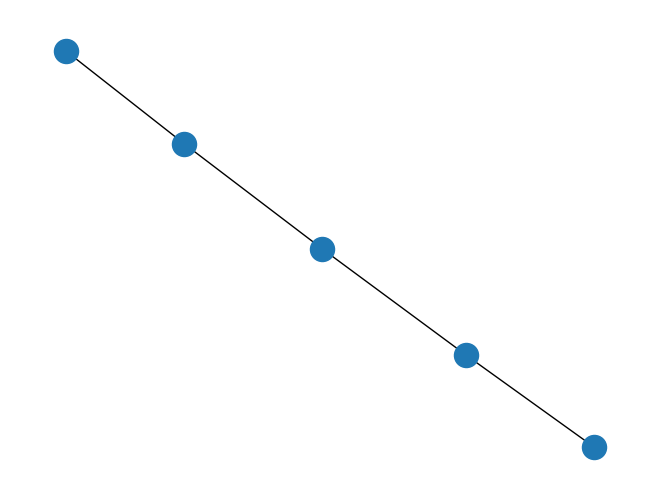

In [19]:
# now let us convert this into the graph to see results of rewriting easier
import networkx as nx

edgelist =  rewritten_graph #[(0, 1)]  # single edge (0,1)
edgelist1  = input_graph#[(0, 1), (3, 4)]  # single edge (0,1)

# filter out edges
# we need to filter out some of the edges from the single nodes

#G = nx.from_edgelist(edgelist)
G1 = nx.to_networkx_graph(edgelist1)
#G = nx.from_edgelist(edgelist)
nx.draw(G1)

